# Análise de Objetos do Espaço

Nesta parte da atividade é feito a leitura e analise dos dados salvos nos arquivos csv.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Importar os dados com o pandas.

In [2]:
regiao_1 = pd.read_csv('regiao_retangular.csv')
regiao_2 = pd.read_csv('regiao_circular.csv')

In [3]:
regiao_1.head()

,coadd_object_id,ra,dec,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered
0,1319819007,39.668020,-34.900571,23.334784,23.105326,23.337204
1,1319818698,39.669994,-34.899249,23.873701,23.734013,23.921062
2,1319818600,39.672696,-34.898903,23.032934,22.411650,22.383362
3,1319818187,39.673526,-34.897240,24.445993,24.012960,23.982794
4,1319818364,39.674718,-34.897963,24.604071,23.922316,24.223639


In [4]:
regiao_2.head()

,coadd_object_id,ra,dec,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered
0,1319814879,39.859960,-34.884076,26.690311,25.778816,25.249878
1,1319814682,39.857821,-34.883399,23.117847,22.680302,22.600182
2,1319814599,39.858377,-34.882974,23.600460,23.274412,23.380205
3,1319816481,39.882513,-34.890323,24.395483,23.843246,23.718079
4,1319816312,39.883388,-34.889597,23.985781,23.510323,23.364555


### Distribuição espacial da região selecionada



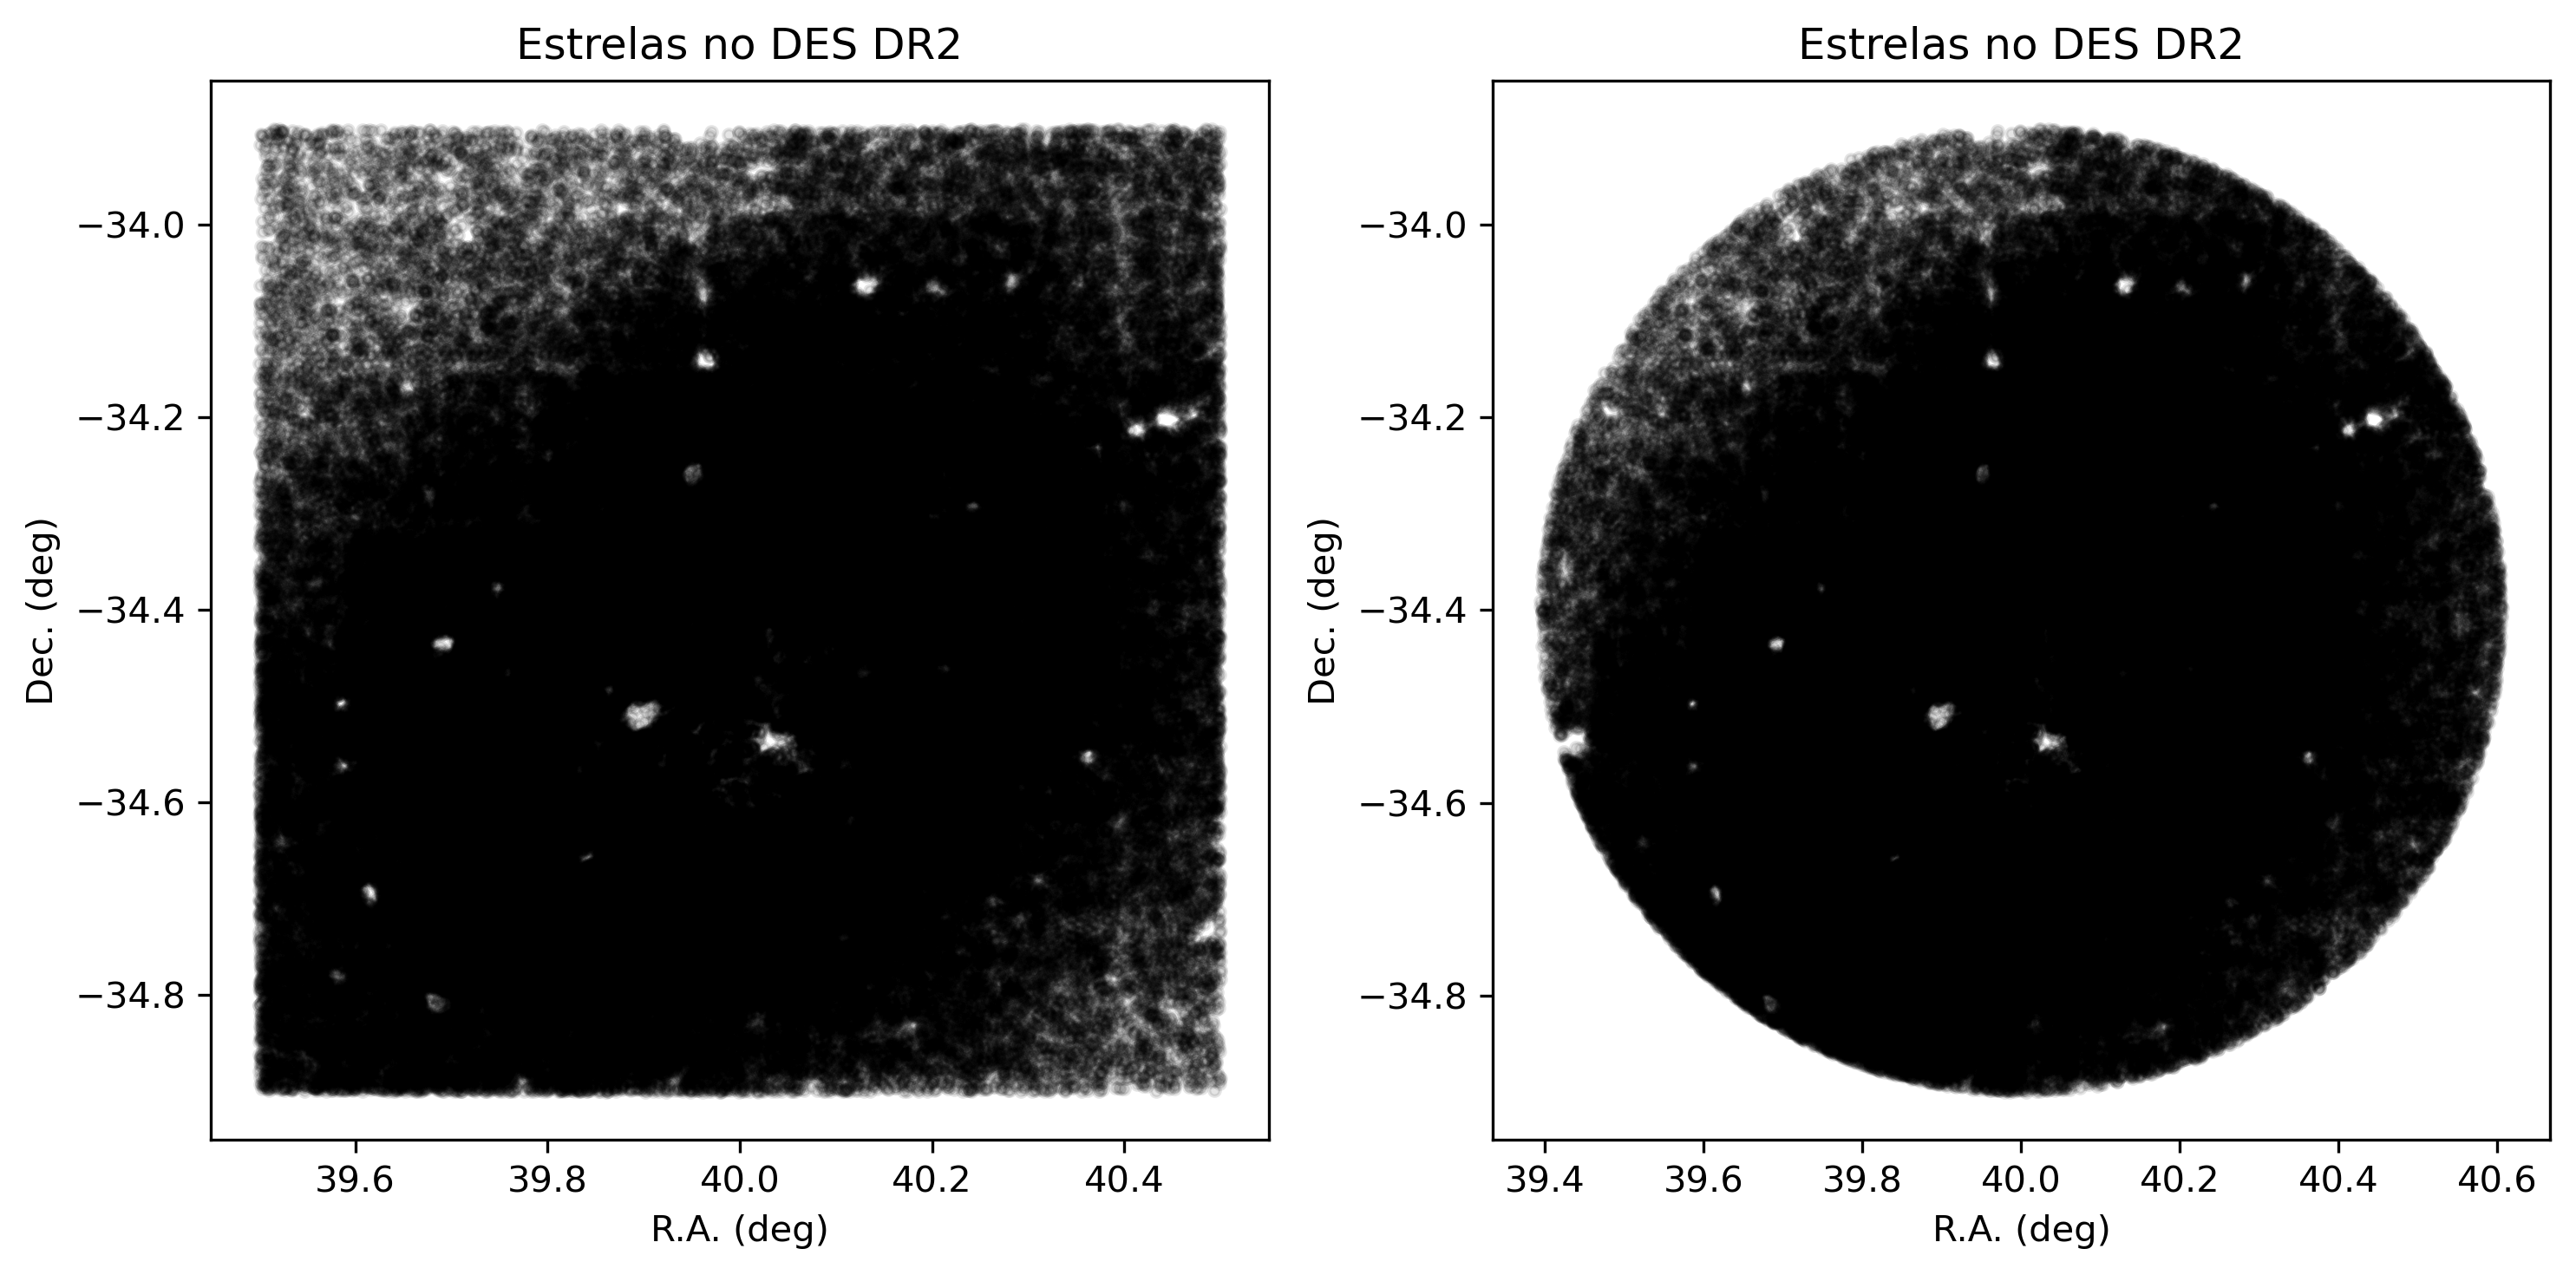

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

axs[0].plot(regiao_1.ra, regiao_1.dec, 'k.', alpha=0.1)
axs[0].set_title('Estrelas no DES DR2')
axs[0].set_xlabel('R.A. (deg)')
axs[0].set_ylabel('Dec. (deg)')

axs[1].plot(regiao_2.ra, regiao_2.dec, 'k.', alpha=0.1)
axs[1].set_title('Estrelas no DES DR2')
axs[1].set_xlabel('R.A. (deg)')
axs[1].set_ylabel('Dec. (deg)')

plt.tight_layout()
plt.show()

### Mapa de densidade

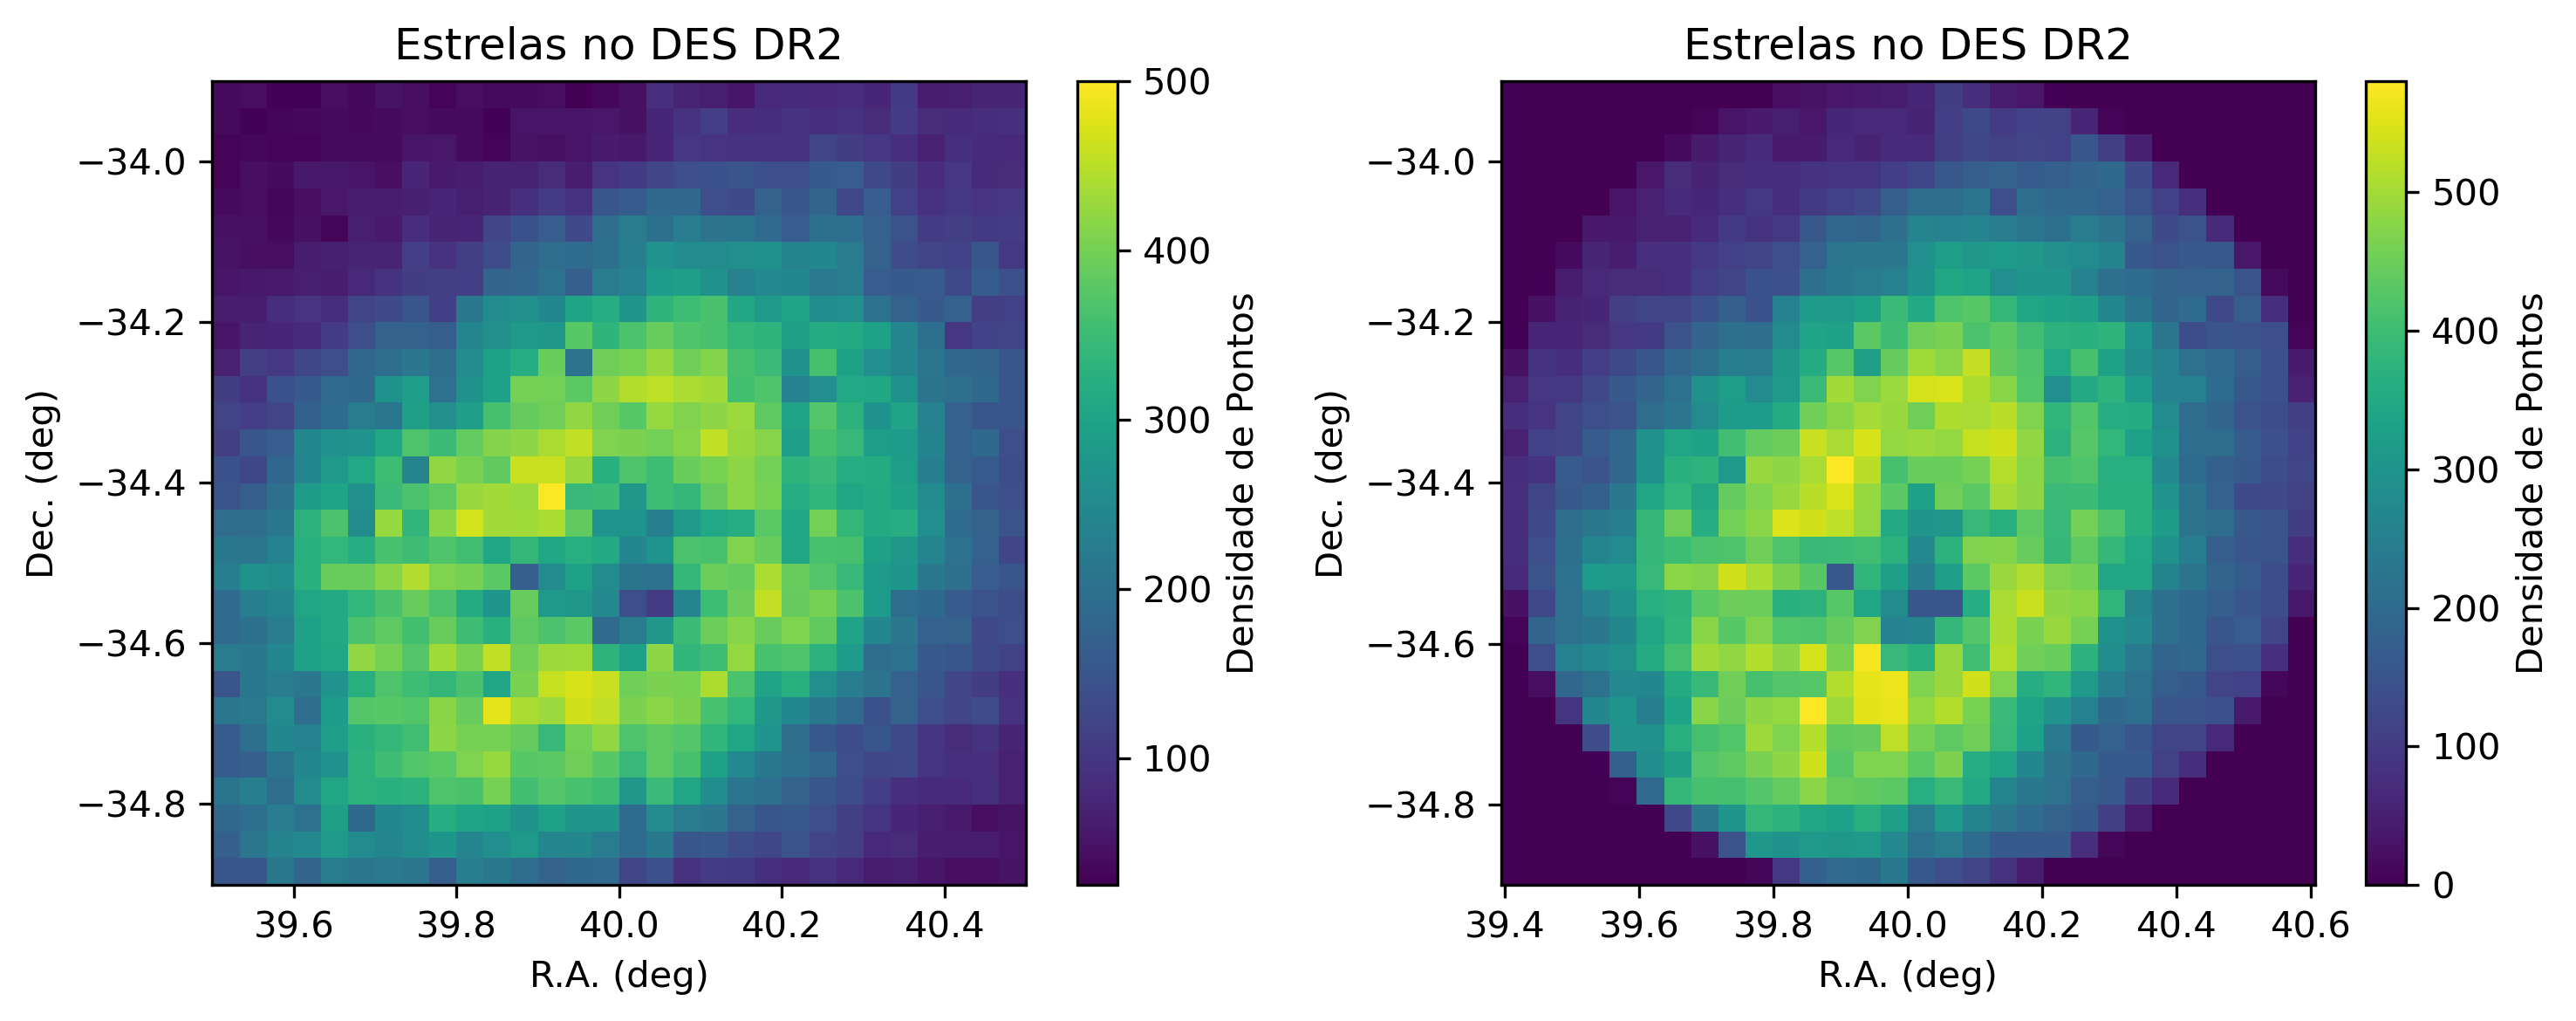

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=300)

hist = axs[0].hist2d(regiao_1.ra, regiao_1.dec, bins=30, cmap='viridis')
axs[0].set_title('Seno Radial')
fig.colorbar(hist[3], ax=axs[0], orientation='vertical', label="Densidade de Pontos") 
axs[0].set_title('Estrelas no DES DR2')
axs[0].set_xlabel('R.A. (deg)')
axs[0].set_ylabel('Dec. (deg)')

hist_2 = axs[1].hist2d(regiao_2.ra, regiao_2.dec, bins=30, cmap='viridis')
fig.colorbar(hist_2[3], ax=axs[1], orientation='vertical', label="Densidade de Pontos") 
axs[1].set_title('Estrelas no DES DR2')
axs[1].set_xlabel('R.A. (deg)')
axs[1].set_ylabel('Dec. (deg)')

plt.tight_layout()
plt.show()

### Diagrama cor-magnitude

Para o diagrama vamos utilizar somente os dados da região circular. É necessário selecionar medidas bem sucedidas da magnitude em que $magnitude \ne 99$. Além disso, criamos uma coluna para descrever a cor, utilizando o padrão de $magnitude_g - magnitude_r$.

In [7]:
regiao_2[regiao_2.mag_auto_g_dered != 99]
regiao_2[regiao_2.mag_auto_r_dered != 99]
regiao_2[regiao_2.mag_auto_i_dered != 99]

regiao_2['color'] = regiao_2.mag_auto_g_dered - regiao_2.mag_auto_r_dered

In [8]:
regiao_2.head()

,coadd_object_id,ra,dec,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,color
0,1319814879,39.859960,-34.884076,26.690311,25.778816,25.249878,0.911495
1,1319814682,39.857821,-34.883399,23.117847,22.680302,22.600182,0.437546
2,1319814599,39.858377,-34.882974,23.600460,23.274412,23.380205,0.326048
3,1319816481,39.882513,-34.890323,24.395483,23.843246,23.718079,0.552237
4,1319816312,39.883388,-34.889597,23.985781,23.510323,23.364555,0.475458


#### Diagrama cor-magnitude no DES DR2

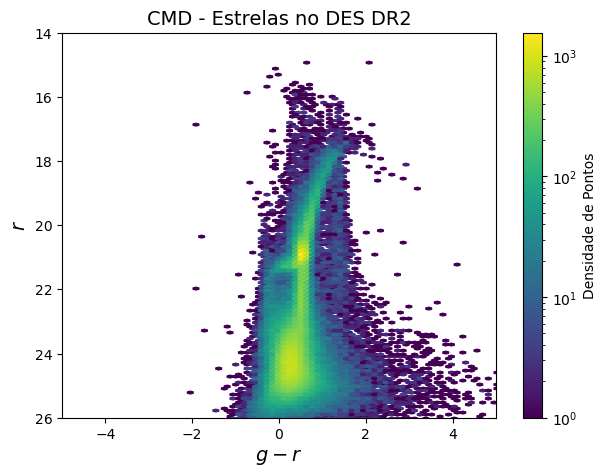

In [9]:
plt.figure(figsize=[7,5])
plt.hexbin(regiao_2.color, regiao_2.mag_auto_r_dered, gridsize=1200, bins='log')
plt.title("CMD - Estrelas no DES DR2", fontsize=14)
plt.xlabel("$g - r$", fontsize=14)
plt.ylabel("$r$", fontsize=14)
plt.colorbar(label="Densidade de Pontos")
plt.xlim(-5.0,5.0)
plt.ylim(26.0, 14.0)
plt.show()